### Check that fields from CPL hist file match those from MOM6

bmom.e22.f09_t061_hycom1_N75.mct.surface_fluxes_check.008

Running for one year excluding heating associated with mass gain/loss from frunoff and lrunoff (after fixing a bug in latent heat)

In [1]:
%matplotlib inline

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from mom6_tools.MOM6grid import MOM6grid
from mom6_tools.m6plot import xyplot
import matplotlib

Basemap module not found. Some regional plots may not function properly


In [2]:
path= '/glade/scratch/gmarques/bmom.e22.f09_t061_hycom1_N75.mct.surface_fluxes_check.008/run/'
grd = MOM6grid(path+'ocean.mom6.static.nc')

MOM6 grid successfully loaded... 



In [17]:
area = np.ma.masked_where(grd.wet==0,grd.area_t)

### Heat balance

#### After one year

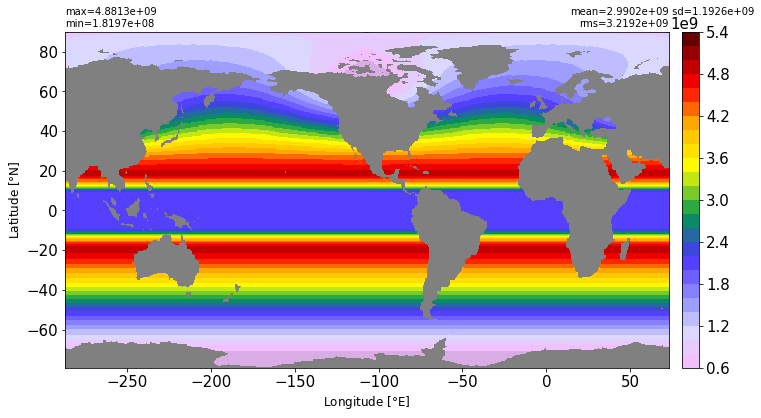

In [19]:
xyplot(area, grd.geolon, grd.geolat, area)

In [14]:
# 008 - after one year, from cpl table: -0.2312 W / m^2
heat = (1.9788327726967973E+25-1.9799489234574726E+25) / (area.sum() * 3600. * 24 * 365.)
print(heat)
print(heat+0.2312)

-0.9837348975393544
-0.7525348975393544


### MOM6 data

In [4]:
#ds_mom =  xr.open_dataset(path+'ocean.mom6.snap_0001.nc')
sfc_mom =  xr.open_dataset(path+'ocean.mom6.sfc_0001.nc')
frc_mom =  xr.open_dataset(path+'ocean.mom6.frc_0001.nc')

/glade/u/home/gmarques/miniconda3/envs/analysis/lib/python3.7/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


### Heat from lprec, fprec, lrunoff, frunoff, icemelt and evap

heat_content_lrunoff


/glade/u/home/gmarques/miniconda3/envs/analysis/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


heat_content_frunoff
heat_content_icemelt
heat_content_cond
heat_content_lprec
heat_content_fprec


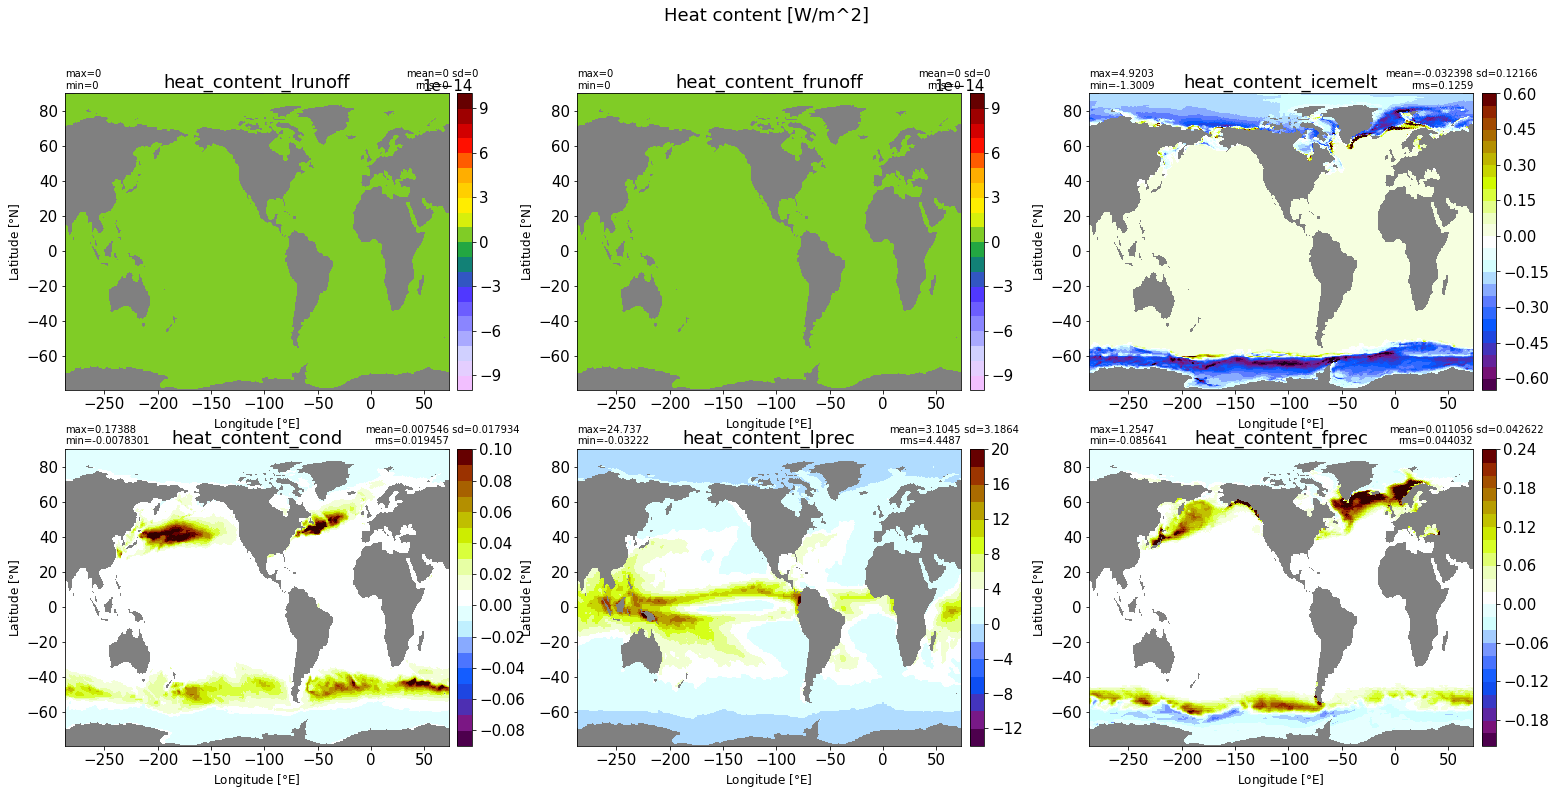

In [6]:
%matplotlib inline

matplotlib.rcParams.update({'font.size': 15})

fields = ['heat_content_lrunoff','heat_content_frunoff',
         'heat_content_icemelt','heat_content_cond','heat_content_lprec',
         'heat_content_fprec']

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(26,12))
ax1 = ax.flatten()
plt.suptitle('Heat content [W/m^2]')
for f in range(len(fields)):
    print(fields[f])
    dummy = np.ma.masked_invalid(frc_mom[fields[f]].mean(dim='time').values)
    xyplot(dummy, grd.geolon, grd.geolat, grd.area_t, title=str(fields[f]), 
       axis=ax1[f], nbins=30,  sigma=5)
    

### Relation between heat_PmE, heat_content_massin, and heat_content_massout

Heat_PmE
heat_content_massout
heat_content_massin


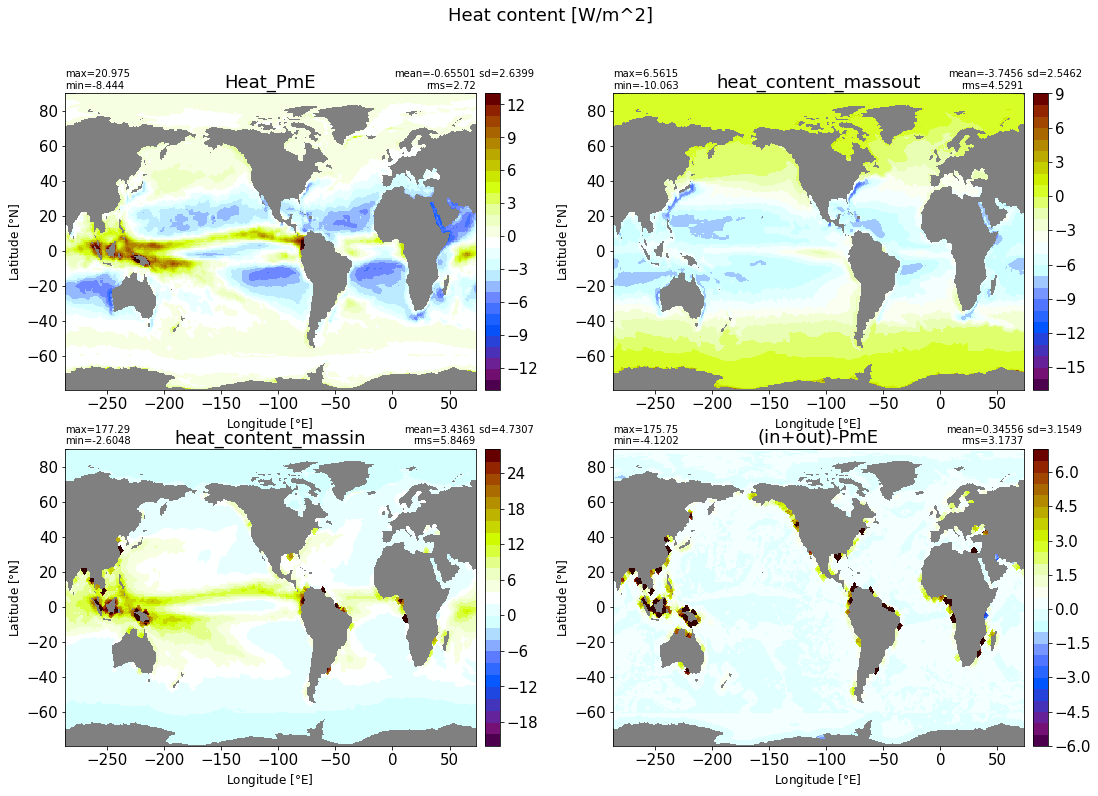

In [8]:
%matplotlib inline

matplotlib.rcParams.update({'font.size': 15})

fields = ['Heat_PmE','heat_content_massout','heat_content_massin']

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18,12))
ax1 = ax.flatten()
plt.suptitle('Heat content [W/m^2]')
for f in range(len(fields)):
    print(fields[f])
    dummy = np.ma.masked_invalid(frc_mom[fields[f]].mean(dim='time').values)
    xyplot(dummy, grd.geolon, grd.geolat, grd.area_t, title=str(fields[f]), 
           axis=ax1[f], nbins=30,  sigma=5)

dummy2 = dummy + np.ma.masked_invalid(frc_mom[fields[1]].mean(dim='time').values) - \
         np.ma.masked_invalid(frc_mom[fields[0]].mean(dim='time').values)

xyplot(dummy2, grd.geolon, grd.geolat, grd.area_t, title='(in+out)-PmE', 
           axis=ax1[3], nbins=30)

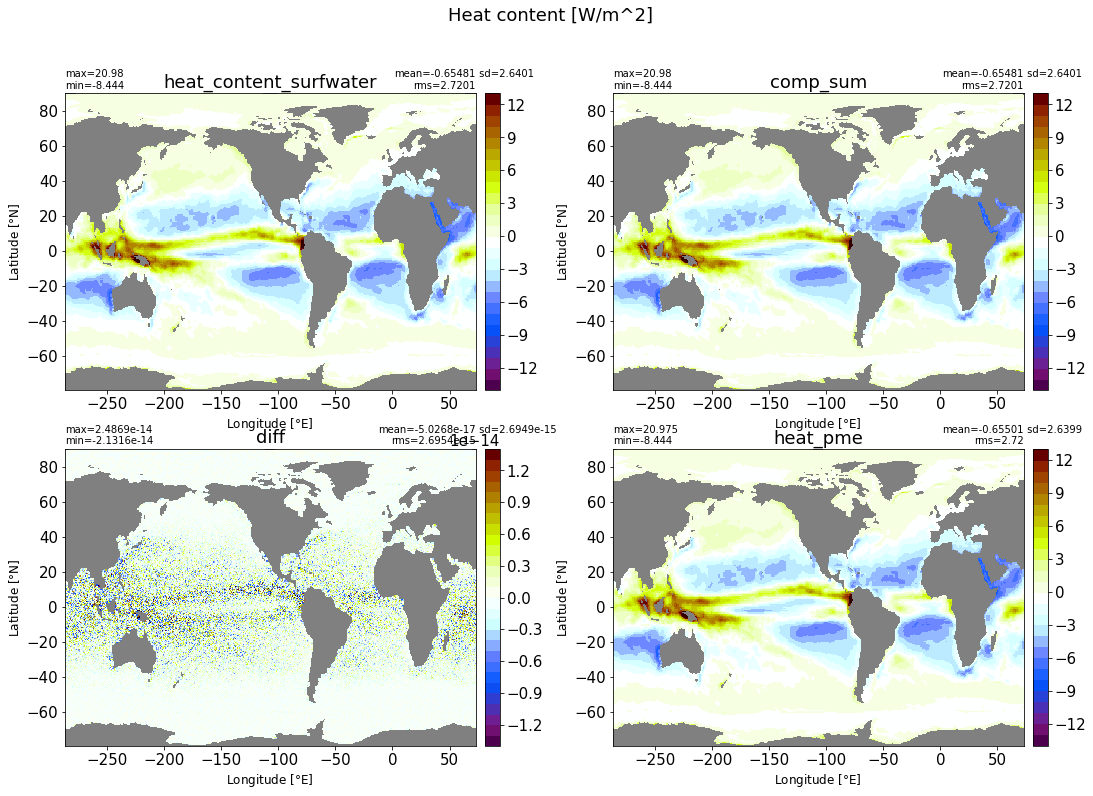

In [16]:
heat_content_lprec = np.ma.masked_invalid(frc_mom.heat_content_lprec.mean(dim='time').values)
heat_content_fprec = np.ma.masked_invalid(frc_mom.heat_content_fprec.mean(dim='time').values)
heat_content_meltw = np.ma.masked_invalid(frc_mom.heat_content_icemelt.mean(dim='time').values)
heat_content_frunoff = np.ma.masked_invalid(frc_mom.heat_content_frunoff.mean(dim='time').values)
heat_content_lrunoff = np.ma.masked_invalid(frc_mom.heat_content_lrunoff.mean(dim='time').values)
heat_content_cond = np.ma.masked_invalid(frc_mom.heat_content_cond.mean(dim='time').values)
heat_content_massout = np.ma.masked_invalid(frc_mom.heat_content_massout.mean(dim='time').values)
heat_content_surfwater = np.ma.masked_invalid(frc_mom.heat_content_surfwater.mean(dim='time').values)
heat_pme = np.ma.masked_invalid(frc_mom.Heat_PmE.mean(dim='time').values)

comp_sum = ( heat_content_lprec + heat_content_fprec  + heat_content_meltw
           + heat_content_frunoff + heat_content_cond + heat_content_massout + heat_content_lrunoff)

diff = comp_sum - heat_content_surfwater
fields = ['heat_content_surfwater','comp_sum','diff','heat_pme']
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18,12))
ax1 = ax.flatten()
plt.suptitle('Heat content [W/m^2]')

# heat_content_surfwater
xyplot(heat_content_surfwater, grd.geolon, grd.geolat, grd.area_t, title='heat_content_surfwater', 
           axis=ax1[0], nbins=30,  sigma=5)

# comp_sum
xyplot(comp_sum, grd.geolon, grd.geolat, grd.area_t, title='comp_sum', 
           axis=ax1[1], nbins=30,  sigma=5)

# diff
xyplot(diff, grd.geolon, grd.geolat, grd.area_t, title='diff', 
           axis=ax1[2], nbins=30,  sigma=5)

# heat_pme
xyplot(heat_pme, grd.geolon, grd.geolat, grd.area_t*grd.wet, title='heat_pme', 
           axis=ax1[3], nbins=30,  sigma=5)
